In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from fastai.learner import *

In [2]:
path_upper="/Users/pava/Documents/sjsu/category-upper-all-everything.txt"
df_upper = pd.read_csv(path_upper, sep=":")
del df_upper['total']

In [3]:
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       ...,
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516]])

In [5]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_

In [6]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
centers = kmeans.cluster_centers_
# sns.scatterplot(x="t_floral",  y="t_stripe", hue=df_upper['label_kmeans'], data=df_upper)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

In [8]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.196673,-0.384810
1,-0.196673,-0.384810
2,-0.497577,0.380110
3,-0.196673,-0.384810
4,-0.196673,-0.384810
...,...,...
139704,-0.401515,2.207548
139705,-0.196673,-0.384810
139706,-0.196673,-0.384810
139707,-0.196673,-0.384810


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

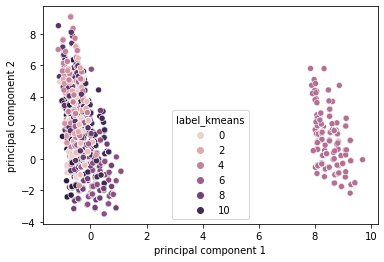

In [9]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

In [10]:
path_lower="/Users/pava/Documents/sjsu/category-lower-all-everything.txt"
df_lower = pd.read_csv(path_lower, sep=":")
del df_lower['total']

In [11]:
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       ...,
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646]])

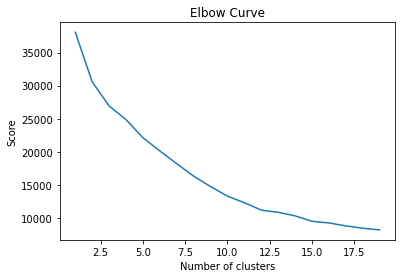

In [13]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [14]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [15]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,14
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
centers_lower = kmeans_lower.cluster_centers_

In [17]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,2.037144,0.986068
1,-0.237854,-0.169899
2,-1.507838,-0.291036
3,0.840088,0.413153
4,-0.429895,0.292016
...,...,...
58958,-1.507838,-0.291036
58959,-1.507838,-0.291036
58960,-1.507838,-0.291036
58961,-0.237854,-0.169899


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

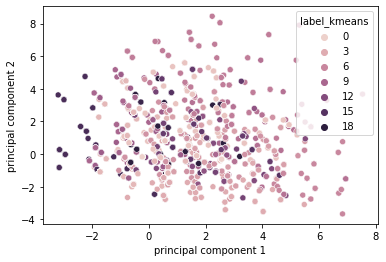

In [18]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

In [19]:
userrating = []

for i in range(0,100):
    x = random.randint(1,5)
    userrating.append(x)

top=[]
bottom=[]
for i in range(0,100):
    x = random.randint(1,139704)
    top.append(x)
    y = random.randint(1,139704)
    bottom.append(y)

In [20]:
df_top_bottom_rating = pd.DataFrame({'top': pd.Series(top), 'bottom': pd.Series(bottom), 'itemRating':pd.Series(userrating)})
df_top_bottom_rating

,top,bottom,itemRating
0,36931,94493,3
1,11544,96691,1
2,64727,70458,2
3,130882,18024,1
4,124293,93865,3
...,...,...,...
95,122925,138408,5
96,52937,17515,5
97,21381,86714,4
98,120664,116801,4


In [21]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]


In [22]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

In [23]:
df_top_bottom_rating

,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,36931,94493,3,1,14
1,11544,96691,1,1,0
2,64727,70458,2,11,2
3,130882,18024,1,1,15
4,124293,93865,3,1,18
...,...,...,...,...,...
95,122925,138408,5,1,0
96,52937,17515,5,1,0
97,21381,86714,4,1,0
98,120664,116801,4,1,2


In [24]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,1,14,3
1,1,0,1
2,11,2,2
3,1,15,1
4,1,18,3
...,...,...,...
95,1,0,5
96,1,0,5
97,1,0,4
98,1,2,4


In [25]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,14,2.000000
1,1,0,3.172414
2,1,1,5.000000
3,1,2,3.500000
4,1,3,3.000000
5,1,7,5.000000
6,1,10,5.000000
7,1,14,3.076923
8,1,15,2.666667
9,1,16,2.000000


In [28]:
rating_crosstab = cluster_mapping_average.pivot_table(values='itemRating', index='topClusterRating', columns='bottomClusterRating', fill_value=0)
rating_crosstab

bottomClusterRating,0,1,2,3,5,7,10,14,15,16,17,18
topClusterRating,,,,,,,,,,,,
0,0.000000,0,0.0,0,0,0,0,2.000000,0.000000,0,0,0
1,3.172414,5,3.5,3,0,5,5,3.076923,2.666667,2,4,3
2,0.000000,0,2.0,0,0,0,0,4.000000,0.000000,0,0,0
4,4.000000,0,3.0,0,0,0,0,0.000000,0.000000,0,0,0
6,0.000000,0,0.0,0,0,0,0,1.000000,0.000000,0,0,0
9,2.666667,0,4.0,0,0,0,0,2.600000,0.000000,0,0,0
10,3.000000,0,0.0,0,0,0,0,0.000000,0.000000,0,0,0
11,0.000000,0,2.0,0,3,0,0,0.000000,0.000000,0,0,0
